In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
df.notnull().sum()

Release_Date         9827
Title                9827
Overview             9827
Popularity           9827
Vote_Count           9827
Vote_Average         9827
Original_Language    9827
Genre                9827
Poster_Url           9827
dtype: int64

# Exploration summary

- Dataset: 9 columns, 9,827 rows.
- No missing values and no duplicate rows detected.
- Release_Date is currently an object — convert to datetime for time-based analysis and extract year/month as needed.
- Popularity contains noticeable outliers — consider log transform, clipping/winsorizing, or robust statistics for modeling.
- Genre contains comma-separated values with extra whitespace — split into lists and .strip() each item; consider exploding the column for per-genre analysis.
- Overview is text (useful for NLP or enrichment) — only drop if you won't perform any text analysis.
- Poster_Url is not useful for analysis — drop this column.
- Original_Language may be useful for grouping or filtering; drop only if unnecessary for your objectives.


In [9]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [11]:
cols=['Overview','Original_Language','Poster_Url',]

In [12]:
df.drop(cols, axis=1, inplace=True)

In [13]:
df['Release_Date'] = df['Release_Date'].dt.year

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [15]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    df[col] = pd.cut(df[col],bins=edges,labels=labels, duplicates='drop')
    return df

In [16]:
labels = ['Not popular','below_average','average','popular']
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
df = categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'Not popular', NaN]
Categories (4, object): ['Not popular' < 'below_average' < 'average' < 'popular']

In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [22]:
df['Vote_Average'].value_counts()

Vote_Average
Not popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [24]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# we'd splitgenres into a list and then explode our dataframe to have only one genre per row for each movie #

In [28]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [31]:
#casting colum into categort
df['Genre'] = df['Genre'].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [33]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [34]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# DATA VISVALIZATION #

In [35]:
sns.set_style('darkgrid')

# WHAT IS THE MOST FREQUENT GENRE OF MOVIE RELEASED ON NETFLIX #

In [36]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

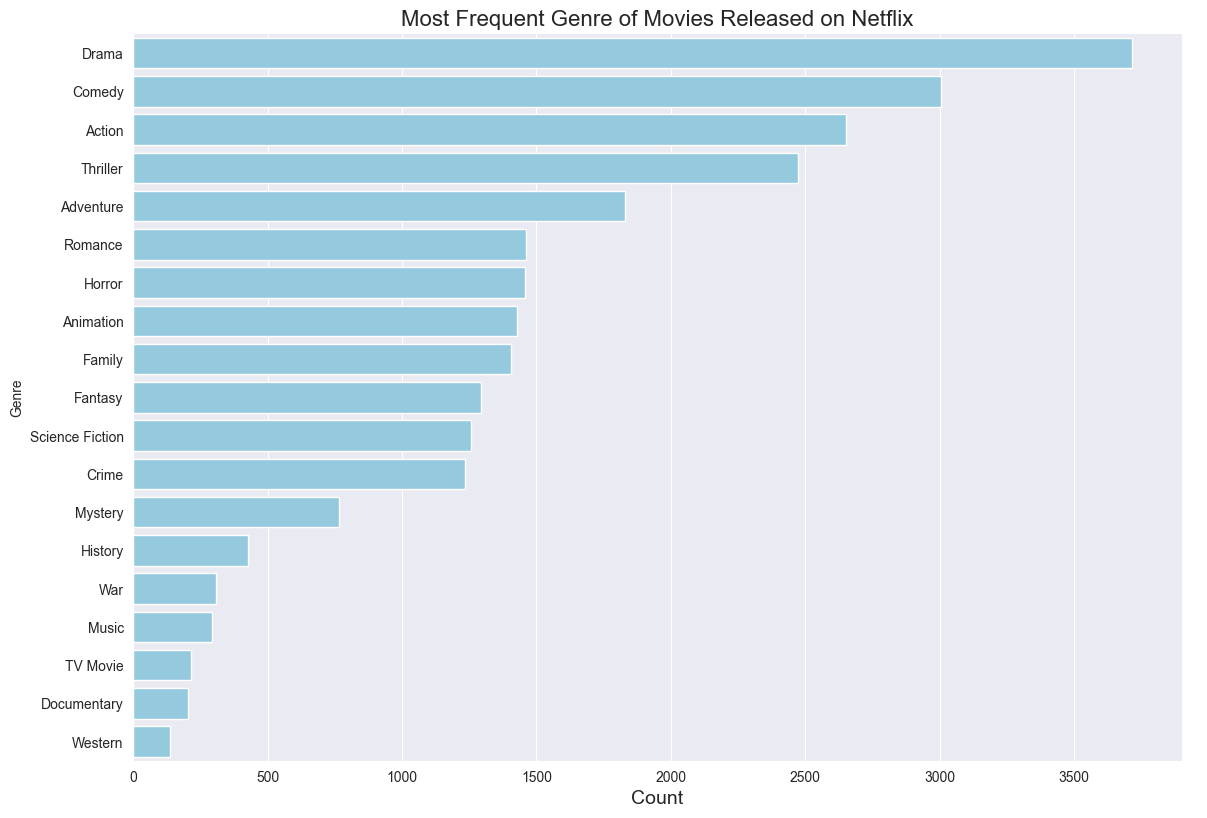

In [38]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index, height=8, aspect=1.5,color='skyblue')
plt.title('Most Frequent Genre of Movies Released on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.show()

# WHICH HAS HIGHEST VOTES IN VOTE AVG_COLMN #

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


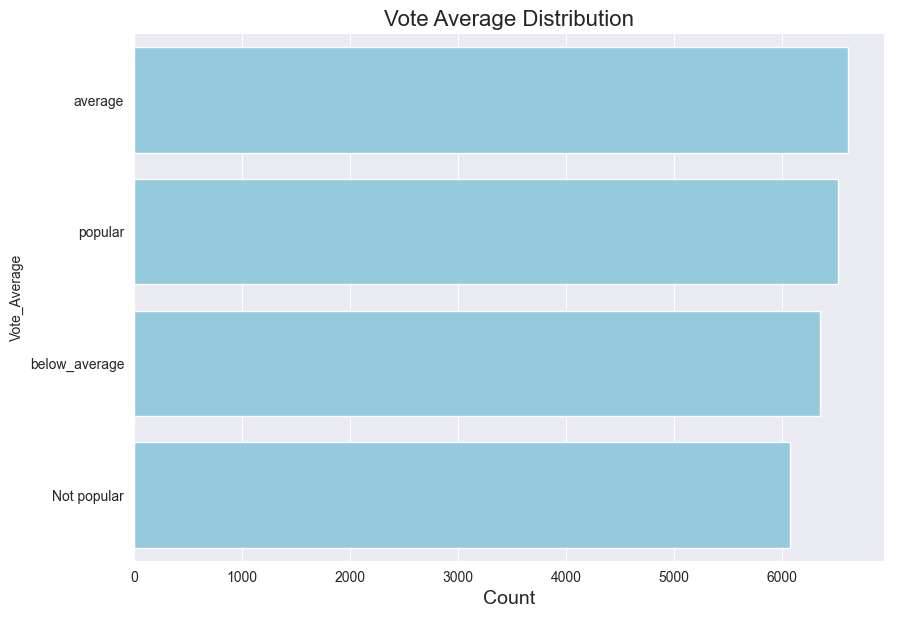

In [47]:
sns.catplot(y='Vote_Average',data=df , kind='count', order=df['Vote_Average'].value_counts().index, height=6, aspect=1.5, color='skyblue')
plt.xlabel('Count', fontsize=14)
plt.title('Vote Average Distribution', fontsize=16)
plt.show()

# WHAT MOVIE GOT THE HIGHEST POPULARITY? WHATS ITS GENRE? #

In [48]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# WHAT IS THE MOVIE WITH THE LOWEST POPULARITY #

In [49]:
df[df['Popularity']==df['Popularity'].min() ]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# WHICH YEAR HAS THE MOST FLIMMED MOVIE #

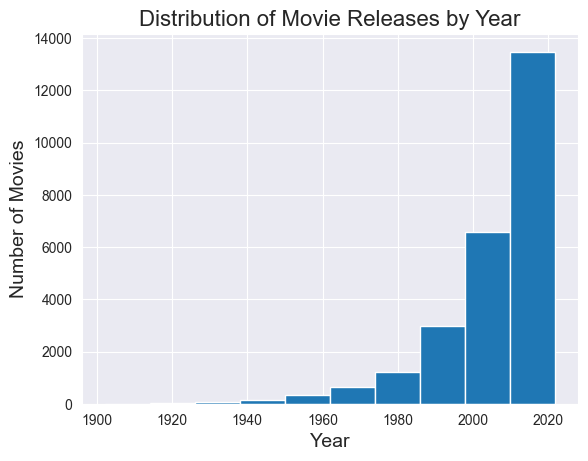

In [51]:
df['Release_Date'].hist()
plt.title('Distribution of Movie Releases by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.show()

In [ ]:
# Project Summary

## Dataset
- Source: mymoviedb.csv (loaded into `df`)
- Current shape: 25,552 rows × 6 columns
- Columns retained: Release_Date (year), Title, Popularity, Vote_Count, Vote_Average (categorical), Genre (categorical)
- Missing data & duplicates: cleaned earlier; rows with NA were dropped

## Data cleaning & preprocessing
- Converted `Release_Date` to datetime then extracted the year (int).
- Dropped unneeded text/metadata columns: `Overview`, `Original_Language`, `Poster_Url`.
- Converted `Genre` from comma-separated strings to lists and exploded the dataframe so each row has a single genre.
- Cast `Genre` and `Vote_Average` to categorical types.
- Transformed `Vote_Average` into 4 ordinal categories using quartile-based bins: `['Not popular', 'below_average', 'average', 'popular']`.
- Ensured numeric types for relevant columns (`Popularity`, `Vote_Count`, etc.) and removed any remaining NA rows.

## Exploratory analysis & visualizations
- Genre frequency: a categorical count plot shows the most frequent genres (ordered by count).
- Vote average distribution: categorical count of `Vote_Average` shows how movies fall into popularity bins.
- Popularity extremes: identified movies with maximum and minimum `Popularity`.
- Temporal distribution: histogram of `Release_Date` (years) to inspect how releases are distributed over time.
- Noted that `Popularity` contains noticeable outliers — visual inspection recommended before modeling.

## Key observations
- The dataset now has one genre per row (after exploding), enabling per-genre aggregation and comparison.
- `Vote_Average` has been discretized so analyses can use ordinal groupings rather than raw scores.
- Popularity skew/outliers may bias mean-based summaries and models; robust statistics or log-transforms are advisable.
- Text features were removed (Overview) — if text analysis or enrichment is desired, revert or re-ingest those columns.
